<a href="https://colab.research.google.com/github/georgiastuart/WeTeach_Python/blob/main/NOAA_Data_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
import pandas as pd

In [2]:
with open('token.txt', 'r') as fp:
  token = fp.read().strip()

In [3]:
weather = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/datatypes', params={'limit': 1000}, headers={'token': token})
weather

<Response [200]>

In [4]:
print(json.dumps(weather.json(), indent=2))

{
  "metadata": {
    "resultset": {
      "offset": 1,
      "count": 1565,
      "limit": 1000
    }
  },
  "results": [
    {
      "mindate": "1994-03-19",
      "maxdate": "1996-05-28",
      "name": "Average cloudiness midnight to midnight from 30-second ceilometer data",
      "datacoverage": 1,
      "id": "ACMC"
    },
    {
      "mindate": "1965-01-01",
      "maxdate": "2005-12-31",
      "name": "Average cloudiness midnight to midnight from manual observations",
      "datacoverage": 1,
      "id": "ACMH"
    },
    {
      "mindate": "1994-02-01",
      "maxdate": "1996-05-28",
      "name": "Average cloudiness sunrise to sunset from 30-second ceilometer data",
      "datacoverage": 1,
      "id": "ACSC"
    },
    {
      "mindate": "1965-01-01",
      "maxdate": "2005-12-31",
      "name": "Average cloudiness sunrise to sunset from manual observations",
      "datacoverage": 1,
      "id": "ACSH"
    },
    {
      "mindate": "1991-06-05",
      "maxdate": "2021-07-11",

In [5]:
weather.json()['metadata']

{'resultset': {'count': 1565, 'limit': 1000, 'offset': 1}}

In [6]:
len(weather.json()['results'])

1000

In [7]:
for result in weather.json()['results']:
  print('{}: {}'.format(result['name'], result['id']))

Average cloudiness midnight to midnight from 30-second ceilometer data: ACMC
Average cloudiness midnight to midnight from manual observations: ACMH
Average cloudiness sunrise to sunset from 30-second ceilometer data: ACSC
Average cloudiness sunrise to sunset from manual observations: ACSH
Base Data: ALL
Long-term averages of annual cooling degree days with base 45F: ANN-CLDD-BASE45
Long-term averages of annual cooling degree days with base 50F: ANN-CLDD-BASE50
Long-term averages of annual cooling degree days with base 55F: ANN-CLDD-BASE55
Long-term averages of annual cooling degree days with base 57F: ANN-CLDD-BASE57
Long-term averages of annual cooling degree days with base 60F: ANN-CLDD-BASE60
Long-term averages of annual cooling degree days with base 70F: ANN-CLDD-BASE70
Long-term averages of annual cooling degree days with base 72F: ANN-CLDD-BASE72
Long-term averages of annual cooling degree days with base 65F: ANN-CLDD-NORMAL
Long-term averages of annual diurnal temperature range:

In [8]:
station_id = 'GHCND:USC00410433'
location_id = 'FIPS:48'

In [9]:
params = {
    'limit': 1000, 
    'locationid': location_id,
    # 'stationid': station_id,
    'startdate': '2010-01-01'
}

station_data_types = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/datatypes', params=params, headers={'token': token})
station_data_types

<Response [200]>

In [10]:
len(station_data_types.json()['results'])

882

In [11]:
for datatype in station_data_types.json()['results']:
  print('{}: {}'.format(datatype['name'], datatype['id']))

Base Data: ALL
Long-term averages of annual cooling degree days with base 45F: ANN-CLDD-BASE45
Long-term averages of annual cooling degree days with base 50F: ANN-CLDD-BASE50
Long-term averages of annual cooling degree days with base 55F: ANN-CLDD-BASE55
Long-term averages of annual cooling degree days with base 57F: ANN-CLDD-BASE57
Long-term averages of annual cooling degree days with base 60F: ANN-CLDD-BASE60
Long-term averages of annual cooling degree days with base 70F: ANN-CLDD-BASE70
Long-term averages of annual cooling degree days with base 72F: ANN-CLDD-BASE72
Long-term averages of annual cooling degree days with base 65F: ANN-CLDD-NORMAL
Long-term averages of annual diurnal temperature range: ANN-DUTR-NORMAL
Long-term averages of annual growing degree days with base 40F: ANN-GRDD-BASE40
Long-term averages of annual growing degree days with base 45F: ANN-GRDD-BASE45
Long-term averages of annual growing degree days with base 50F: ANN-GRDD-BASE50
Long-term averages of annual grow

In [12]:
ds_params = {
    'stationid': station_id,
    'limit': 1000
}

datasets = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/datasets', params=params, headers={'token': token})
datasets

<Response [200]>

In [13]:
datasets.json()

{'metadata': {'resultset': {'count': 11, 'limit': 1000, 'offset': 1}},
 'results': [{'datacoverage': 1,
   'id': 'GHCND',
   'maxdate': '2021-07-12',
   'mindate': '1763-01-01',
   'name': 'Daily Summaries',
   'uid': 'gov.noaa.ncdc:C00861'},
  {'datacoverage': 1,
   'id': 'GSOM',
   'maxdate': '2021-06-01',
   'mindate': '1763-01-01',
   'name': 'Global Summary of the Month',
   'uid': 'gov.noaa.ncdc:C00946'},
  {'datacoverage': 1,
   'id': 'GSOY',
   'maxdate': '2021-01-01',
   'mindate': '1763-01-01',
   'name': 'Global Summary of the Year',
   'uid': 'gov.noaa.ncdc:C00947'},
  {'datacoverage': 0.95,
   'id': 'NEXRAD2',
   'maxdate': '2021-07-11',
   'mindate': '1991-06-05',
   'name': 'Weather Radar (Level II)',
   'uid': 'gov.noaa.ncdc:C00345'},
  {'datacoverage': 0.95,
   'id': 'NEXRAD3',
   'maxdate': '2021-07-11',
   'mindate': '1994-05-20',
   'name': 'Weather Radar (Level III)',
   'uid': 'gov.noaa.ncdc:C00708'},
  {'datacoverage': 1,
   'id': 'NORMAL_ANN',
   'maxdate': '201

In [63]:
params = {
    'datasetid': 'GHCND',
    'stationid': station_id,
    'startdate': '2020-05-01',
    'enddate': '2021-05-01',
    'limit': 1000,
    'datatypeid': ['TMAX', 'TMIN']
}

daily_summaries = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data',  params=params, headers={'token': token})
daily_summaries

<Response [200]>

In [64]:
daily_results = daily_summaries.json()['results']
daily_results

[{'attributes': ',,7,0700',
  'datatype': 'TMAX',
  'date': '2020-05-01T00:00:00',
  'station': 'GHCND:USC00410433',
  'value': 306},
 {'attributes': ',,7,0700',
  'datatype': 'TMIN',
  'date': '2020-05-01T00:00:00',
  'station': 'GHCND:USC00410433',
  'value': 122},
 {'attributes': ',,7,0700',
  'datatype': 'TMAX',
  'date': '2020-05-02T00:00:00',
  'station': 'GHCND:USC00410433',
  'value': 300},
 {'attributes': ',,7,0700',
  'datatype': 'TMIN',
  'date': '2020-05-02T00:00:00',
  'station': 'GHCND:USC00410433',
  'value': 161},
 {'attributes': ',,7,0700',
  'datatype': 'TMAX',
  'date': '2020-05-03T00:00:00',
  'station': 'GHCND:USC00410433',
  'value': 322},
 {'attributes': ',,7,0700',
  'datatype': 'TMIN',
  'date': '2020-05-03T00:00:00',
  'station': 'GHCND:USC00410433',
  'value': 194},
 {'attributes': ',,7,0700',
  'datatype': 'TMAX',
  'date': '2020-05-04T00:00:00',
  'station': 'GHCND:USC00410433',
  'value': 333},
 {'attributes': ',,7,0700',
  'datatype': 'TMIN',
  'date': '2

In [76]:
max_temps = []
min_temps = []
dates = []
for daily_value in daily_results:
  if daily_value['datatype'] == 'TMAX':
    max_temps.append(daily_value['value'])
    dates.append(datetime.fromisoformat(daily_value['date']))
  else:
    min_temps.append(daily_value['value'])

Text(0.5, 0, 'Date')

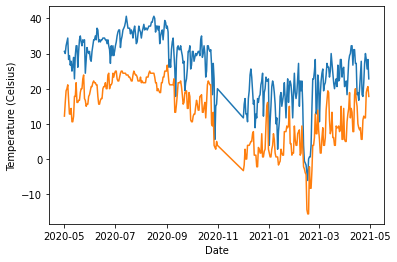

In [78]:
plt.plot(dates, np.array(max_temps) / 10)
plt.plot(dates, np.array(min_temps) / 10)
plt.ylabel('Temperature (Celsius)')
plt.xlabel('Date')

In [84]:
temp_df = pd.DataFrame({'DATE': [d.strftime('%Y-%m-%d') for d in dates], 'TMAX': max_temps, 'TMIN': min_temps})
temp_df

,DATE,TMAX,TMIN
0,2020-05-01,306,122
1,2020-05-02,300,161
2,2020-05-03,322,194
3,2020-05-04,333,200
4,2020-05-05,344,211
...,...,...,...
330,2021-04-26,300,117
331,2021-04-27,283,189
332,2021-04-28,256,200
333,2021-04-29,283,206


In [85]:
temp_df.to_csv('temperature_data.csv')